# Advertiser_SalesModel_RegressionTree:
---

In [3]:
import os
import us
import math
import mpld3
import cycler
import pickle
import tabulate
import warnings
import functools
import itertools
import pydotplus
import numpy as np
import pandas as pd
import sklearn.tree
import sklearn.ensemble
from IPython.display import Image
import statsmodels.api
import concurrent.futures
import seaborn.apionly as sns
import matplotlib as mpl, matplotlib.pyplot as plt
import cachetools
plt.style.use(['classic'])
warnings.filterwarnings('ignore')
pd.set_option('display.expand_frame_repr', True)
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_categories', 300)
pd.set_option('display.width', 208)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.memory_usage', True)
pd.set_option('display.precision', 7)
%matplotlib inline

---
## Configuration:
---

In [4]:
categorical_encoding = None
master_hdf = 'data/advertiser_master_dataframe.hdf'

---
## Data Sources:
---

In [5]:
with pd.HDFStore(master_hdf) as hdf:
    print(hdf.keys())

['/badcrash_buzz', '/city_sales', '/crash_buzz', '/digi_acts', '/digi_acts_bystate', '/digi_acts_bystate_flat', '/digi_acts_flat', '/digi_acts_raw', '/digi_imps', '/digi_imps_bystate', '/digi_imps_cats', '/digi_imps_cats_bystate', '/digi_imps_cats_bystate_flat', '/digi_imps_cats_flat', '/digi_imps_flat', '/djta', '/fuel', '/fuel_bystate', '/ga', '/ga_bystate', '/gtrends', '/gtrends_bystate', '/merged', '/merged_acts', '/merged_noacts', '/merged_state', '/merged_state_noacts', '/offline', '/sales', '/search_acts', '/search_acts_flat', '/search_imps', '/search_imps_flat', '/social_buzz', '/social_buzz_bystate', '/state_sales', '/yougov']


In [6]:
city_sales = pd.read_hdf(master_hdf, 'city_sales')
state_sales = pd.read_hdf(master_hdf, 'state_sales')
sales = pd.read_hdf(master_hdf, 'sales')
merged = pd.read_hdf(master_hdf, 'merged')
merged_acts = pd.read_hdf(master_hdf, 'merged_acts')
merged_noacts = pd.read_hdf(master_hdf, 'merged_noacts');

In [7]:
merged_noacts2 = merged_noacts.drop(['revenue','gtrend','transactions','djta','sessions_count','fuel_price','newusers','social_buzz'], axis = 1)

---
## Decision Tree Regression:
---

---
### Stimuli:
---

0.424584813772


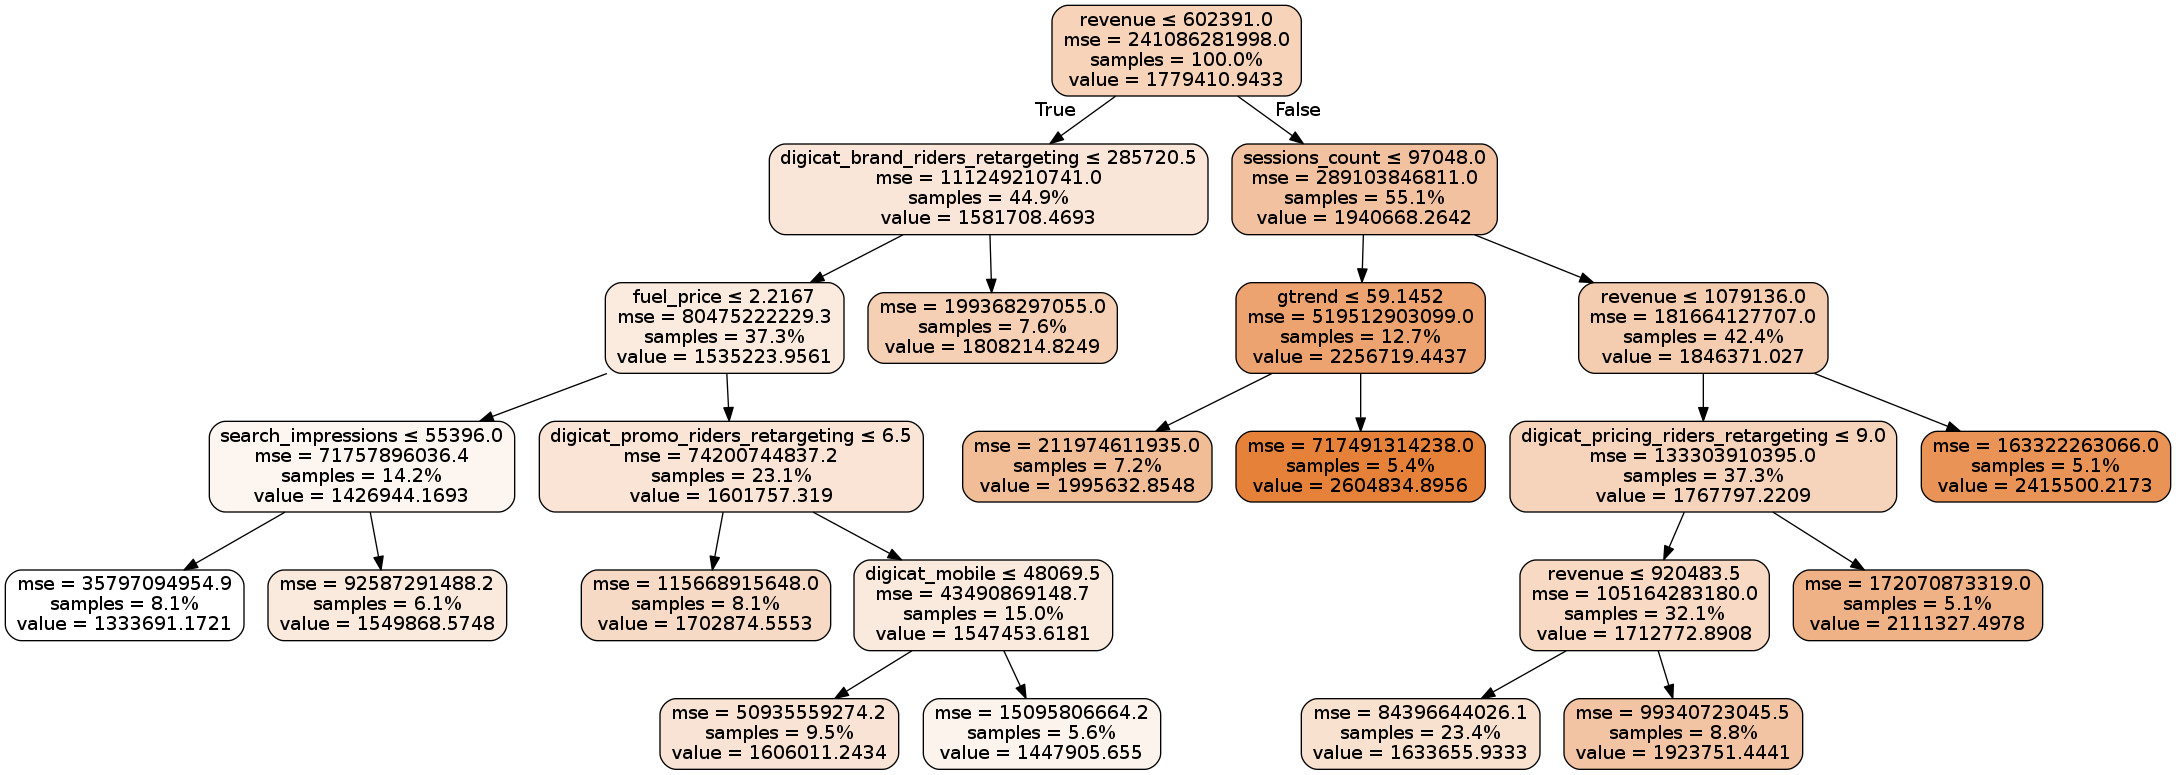

In [6]:
tree = sklearn.tree.DecisionTreeRegressor(max_depth = 5, min_samples_leaf = 30)
tree_fit = tree.fit(merged_noacts.iloc[:, 3:], merged_noacts.sales)
print(tree.score(merged_noacts.iloc[:, 3:], merged_noacts.sales))
tree_xvars = list(merged_noacts.iloc[:, 3:].columns.values)
tree_dot = sklearn.tree.export_graphviz(tree_fit, out_file = None, filled = True, rounded = True, special_characters = True, proportion = True, feature_names = tree_xvars)
tree_graph = pydotplus.graph_from_dot_data(tree_dot)
tree_graph.write_png('charts/stimuli_tree_graph.png')
Image(tree_graph.create_png())

In [7]:
impo_feats = tree_fit.feature_importances_
impo_feats = 10**6 * impo_feats
impo_feats = impo_feats.astype(int)
impo_feats = [x[1] for x in list(reversed(sorted(zip(impo_feats, tree_xvars)))) if x[0] > 0]
print(impo_feats)

['revenue', 'sessions_count', 'gtrend', 'digicat_pricing_riders_retargeting', 'digicat_brand_riders_retargeting', 'fuel_price', 'search_impressions', 'digicat_promo_riders_retargeting', 'digicat_mobile']


---
#### Dropping Direct Correlates:
---

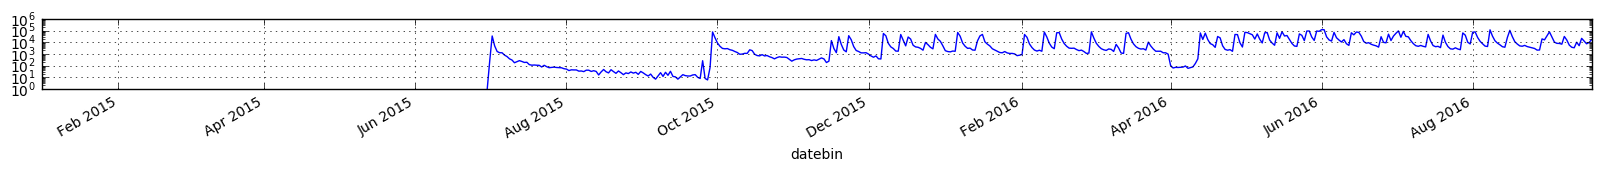

In [8]:
merged_noacts2.digicat_email.plot(figsize = (20, 1), grid = True, logy = True);

0.332653964798


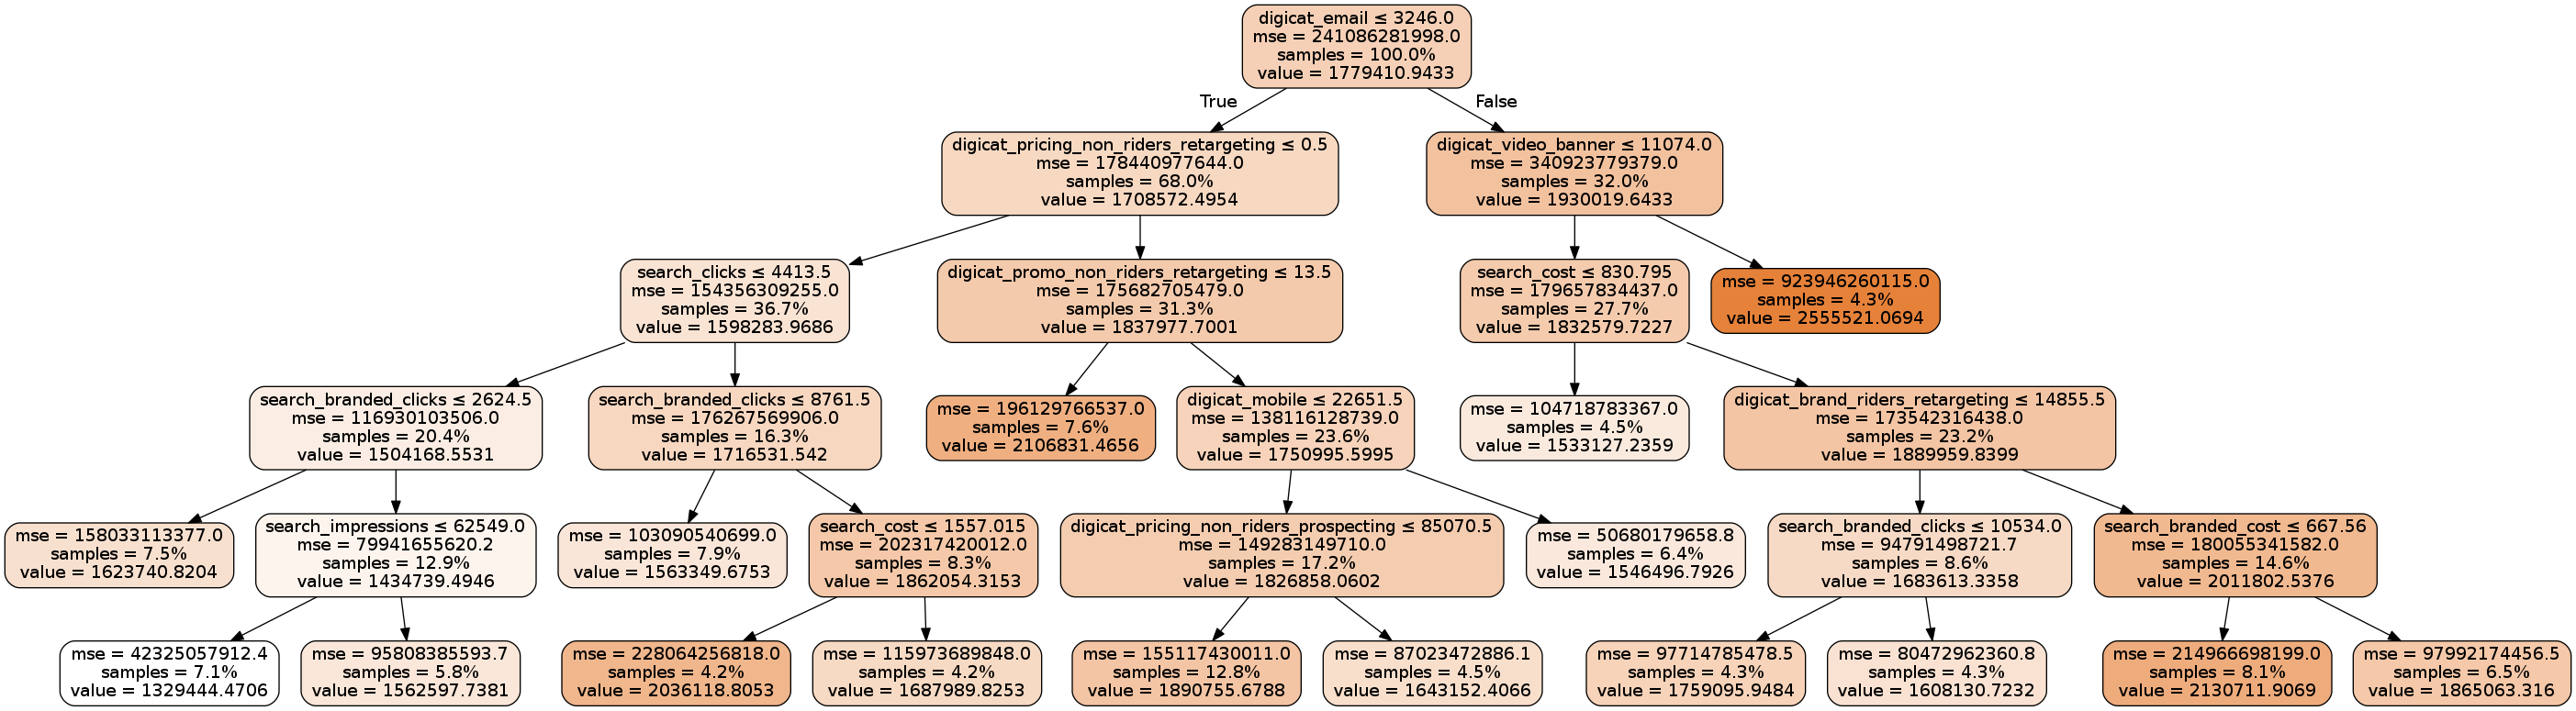

In [19]:
tree = sklearn.tree.DecisionTreeRegressor(max_depth = 5, min_samples_leaf = 30)
tree_fit = tree.fit(merged_noacts2.iloc[:, 3:], merged_noacts2.sales)
print(tree.score(merged_noacts2.iloc[:, 3:], merged_noacts2.sales))
tree_xvars = list(merged_noacts2.iloc[:, 3:].columns.values)
tree_dot = sklearn.tree.export_graphviz(tree_fit, 
    out_file = None, filled = True, rounded = True, special_characters = True, proportion = True, feature_names = tree_xvars)
tree_graph = pydotplus.graph_from_dot_data(tree_dot)
tree_graph.write_png('charts/stimuli_tree_graph2.png')
Image(tree_graph.create_png())

In [10]:
impo_feats = tree_fit.feature_importances_
impo_feats = 10**6 * impo_feats
impo_feats = impo_feats.astype(int)
impo_feats = [x[1] for x in list(reversed(sorted(zip(impo_feats, tree_xvars)))) if x[0] > 0]
print(impo_feats)

['digicat_video_banner', 'digicat_email', 'digicat_pricing_non_riders_retargeting', 'digicat_promo_non_riders_retargeting', 'search_cost', 'digicat_brand_riders_retargeting', 'search_branded_clicks', 'search_clicks', 'digicat_mobile', 'search_branded_cost', 'digicat_pricing_non_riders_prospecting', 'search_impressions']


---
### Actions:
---

0.417831549698
['search_2nd_touch', 'search_atlanta_georgia_station', 'search_bus_tracker', 'search_canada_step_2', 'search_chicago_station', 'search_confirmation', 'search_dallas_texas_station', 'search_fare_finder', 'search_fare_finder_step_1', 'search_fare_finder_step_2', 'search_fare_finder_step_3', 'search_fare_finder_step_4', 'search_homepage', 'search_homepage_unique', 'search_la_station', 'search_nyc_station', 'search_step_2', 'search_step_3', 'search_transactions', 'display_2nd_touch', 'display_atlanta_georgia_station', 'display_bus_tracker', 'display_canada_confirmation', 'display_canada_step_2', 'display_chicago_station', 'display_confirmation', 'display_dallas_texas_station', 'display_fare_finder', 'display_fare_finder_step_1', 'display_fare_finder_step_2', 'display_fare_finder_step_3', 'display_fare_finder_step_4', 'display_homepage', 'display_homepage_unique', 'display_la_station', 'display_nyc_station', 'display_step_2', 'display_step_3', 'display_transactions']


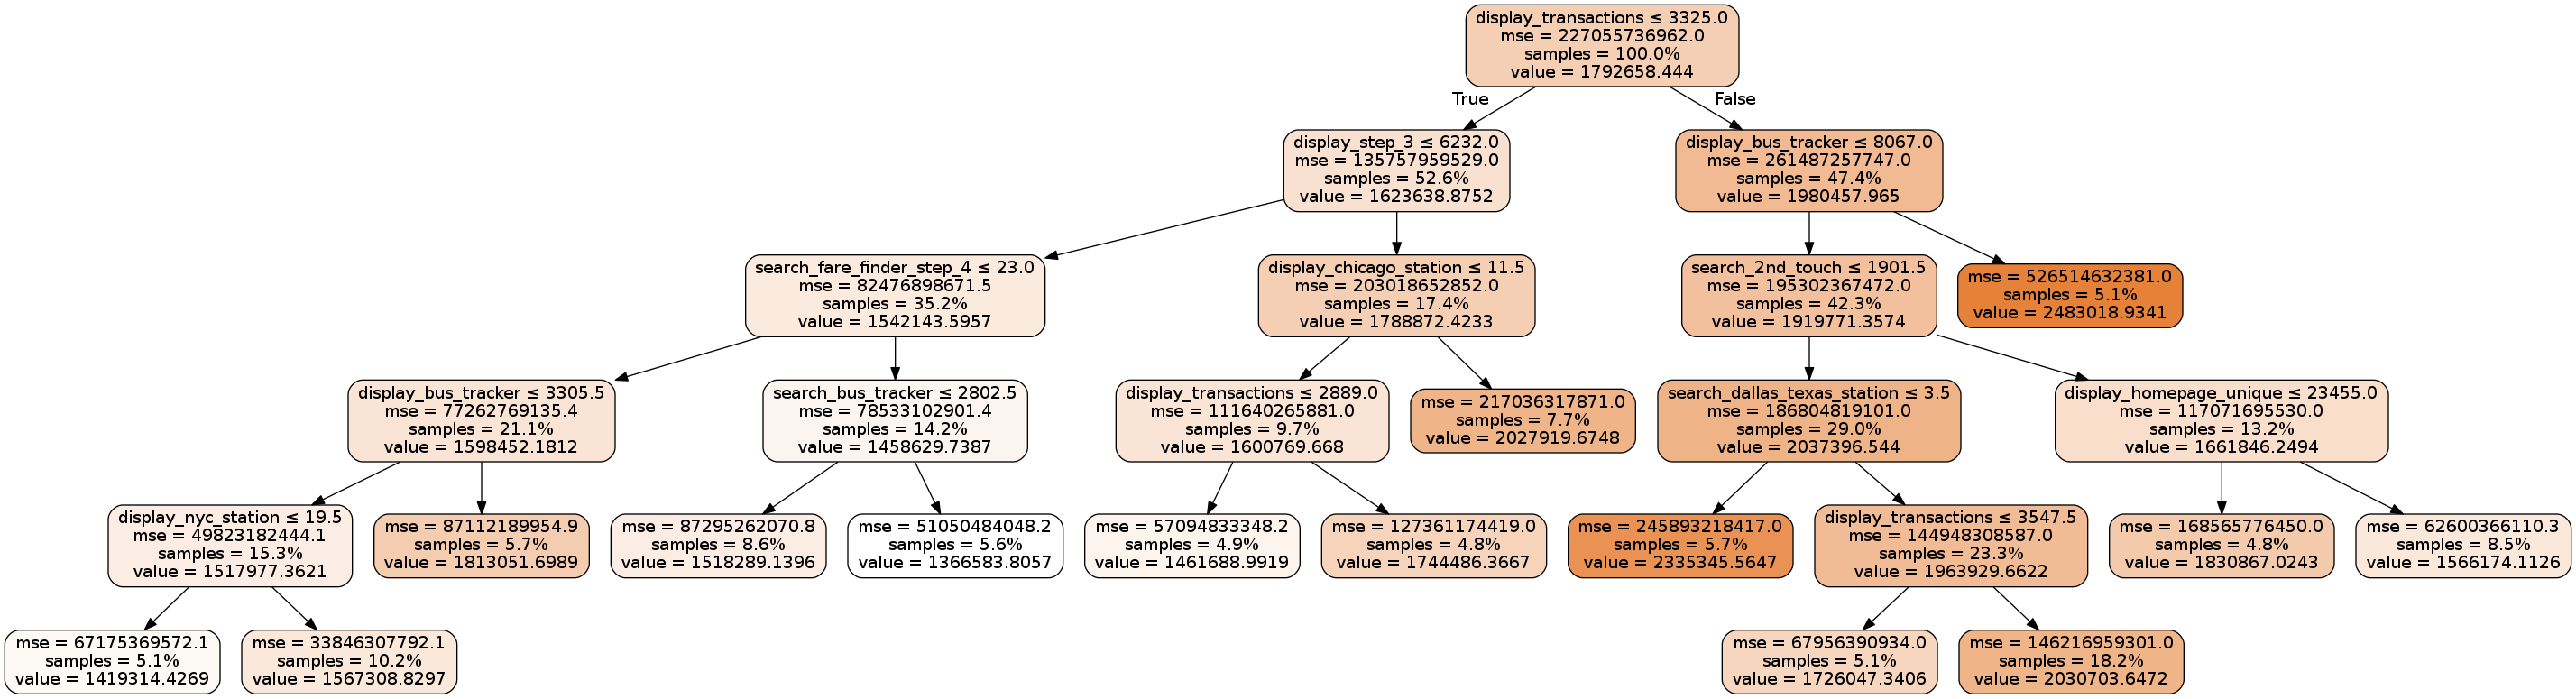

In [11]:
tree = sklearn.tree.DecisionTreeRegressor(max_depth = 5, min_samples_leaf = 30)
tree_fit = tree.fit(merged_acts.iloc[:, 3:], merged_acts.sales)
print(tree.score(merged_acts.iloc[:, 3:], merged_acts.sales))
tree_xvars = list(merged_acts.iloc[:, 3:].columns.values)
print(tree_xvars)
tree_dot = sklearn.tree.export_graphviz(tree_fit, out_file = None, filled = True, rounded = True, special_characters = True, proportion = True, feature_names = tree_xvars)
tree_graph = pydotplus.graph_from_dot_data(tree_dot)
tree_graph.write_png('charts/action_tree_graph.png')
Image(tree_graph.create_png())

In [12]:
impo_feats = tree_fit.feature_importances_
impo_feats = 10**6 * impo_feats
impo_feats = impo_feats.astype(int)
impo_feats = [x[1] for x in list(reversed(sorted(zip(impo_feats, tree_xvars)))) if x[0] > 0]
print(impo_feats)

['display_transactions', 'display_bus_tracker', 'search_2nd_touch', 'display_chicago_station', 'display_step_3', 'search_dallas_texas_station', 'display_homepage_unique', 'search_fare_finder_step_4', 'search_bus_tracker', 'display_nyc_station']


---
## Random Forest Regression:
---

---
### Stimuli:
---

In [13]:
forest = sklearn.ensemble.RandomForestRegressor(max_depth = 5, min_samples_leaf = 14)
forest_fit = forest.fit(merged_noacts.iloc[:, 3:], merged_noacts.sales)
print(forest.score(merged_noacts.iloc[:, 3:], merged_noacts.sales))
forest_xvars = list(merged_noacts.iloc[:, 3:].columns.values)
print(forest_xvars)

0.543251481755
['sessions_count', 'newusers', 'transactions', 'revenue', 'ooh_cost', 'radio_cost', 'gtrend', 'fuel_price', 'djta', 'social_buzz', 'search_cost', 'search_branded_cost', 'search_clicks', 'search_branded_clicks', 'search_impressions', 'search_branded_impressions', 'digicat_brand_non_riders', 'digicat_brand_non_riders_prospecting', 'digicat_brand_non_riders_retargeting', 'digicat_brand_riders', 'digicat_brand_riders_retargeting', 'digicat_email', 'digicat_influencers', 'digicat_mobile', 'digicat_native', 'digicat_pricing_non_riders_prospecting', 'digicat_pricing_non_riders_retargeting', 'digicat_pricing_riders_retargeting', 'digicat_promo_non_riders_prospecting', 'digicat_promo_non_riders_retargeting', 'digicat_promo_riders_retargeting', 'digicat_social_ads', 'digicat_social_video', 'digicat_video', 'digicat_video_banner']


In [14]:
impo_feats = forest_fit.feature_importances_
impo_feats = 10**2 * impo_feats
impo_feats = impo_feats.astype(int)
impo_feats = [x[1] for x in list(reversed(sorted(zip(impo_feats, forest_xvars)))) if x[0] > 0]
print(impo_feats)

['revenue', 'sessions_count', 'gtrend', 'fuel_price', 'djta', 'transactions', 'digicat_pricing_riders_retargeting', 'search_clicks', 'search_branded_clicks', 'search_branded_cost', 'digicat_video', 'digicat_pricing_non_riders_retargeting', 'digicat_email', 'digicat_brand_riders_retargeting']
